In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

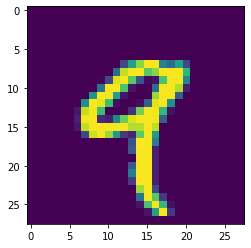

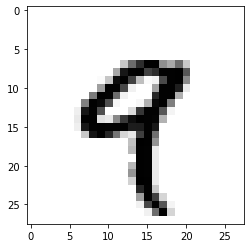

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[4])
plt.show()
plt.imshow(X_train[4], cmap=plt.cm.binary)

In [6]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

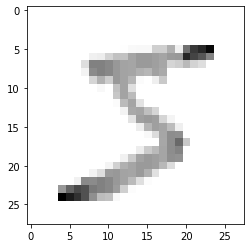

In [7]:
# Normalise the Datasets
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
plt.imshow(X_train[0], cmap=plt.cm.binary)

In [8]:
# After Normalize
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print(Y_train[0])

5


In [10]:
# Resizing Image to make it suitable for applying Convolutional Operation
import numpy as np
IMG_SIZE = 28
X_trainr = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_testr = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training Sample Dimension: ", X_trainr.shape)
print("Testing Sample Dimension: ", X_testr.shape)

Training Sample Dimension:  (60000, 28, 28, 1)
Testing Sample Dimension:  (10000, 28, 28, 1)


In [11]:
# Create a Deep Neural Network 
# Training on 60,000 Samples of MNIST Handwritten Dataset

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [13]:
# Create a Neural Network 
model = Sequential()

# First Convolutional Layer ---> Layer 0 1 2 3 (60000, 28, 28, 1)
model.add(Conv2D(64, (3,3), input_shape = X_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Second Convolutional Layer ---> Layer 4 5 6 7 (60000, 28, 28, 1)
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Third Convolutional Layer ---> Layer 8 9 10 11 (60000, 28, 28, 1)
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully Connected Layer #1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

# Fully Connected Layer #2
model.add(Dense(32))
model.add(Activation("relu"))

# Last Fully Connected Layer 
model.add(Dense(10))
model.add(Activation("softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [15]:
print("Total Training Samples: ", len(X_trainr))

Total Training Samples:  60000


In [16]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [17]:
model.fit(X_trainr, Y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 64s 48ms/step - loss: 0.3216 - accuracy: 0.8993 - val_loss: 0.1250 - val_accuracy: 0.9620
Epoch 2/5
1313/1313 [==============================] - 58s 44ms/step - loss: 0.1058 - accuracy: 0.9671 - val_loss: 0.0891 - val_accuracy: 0.9727
Epoch 3/5
1313/1313 [==============================] - 57s 43ms/step - loss: 0.0747 - accuracy: 0.9768 - val_loss: 0.0739 - val_accuracy: 0.9788
Epoch 4/5
1313/1313 [==============================] - 56s 42ms/step - loss: 0.0596 - accuracy: 0.9815 - val_loss: 0.0911 - val_accuracy: 0.9732
Epoch 5/5
1313/1313 [==============================] - 56s 43ms/step - loss: 0.0452 - accuracy: 0.9861 - val_loss: 0.0616 - val_accuracy: 0.9814


In [18]:
# Evaluating on Testing dataset MNIST
test_loss, test_acc = model.evaluate(X_testr, Y_test)
print("Test Loss on 10000 Test Samples: ", test_loss)
print("Validation Accuracy on 10000 test samples: ", test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 0.0582 - accuracy: 0.9826
Test Loss on 10000 Test Samples:  0.05818483978509903
Validation Accuracy on 10000 test samples:  0.9825999736785889


In [19]:
prediction = model.predict(X_testr)

313/313 [==============================] - 4s 11ms/step


In [20]:
print(prediction)

[[7.98265176e-10 2.85896931e-06 5.74423893e-07 ... 9.99995708e-01
  5.26277555e-09 3.96351481e-07]
 [4.37841300e-06 6.08087112e-06 9.99977112e-01 ... 6.54529777e-06
  2.39536803e-06 5.53697532e-08]
 [2.86623475e-07 9.99987960e-01 9.91209390e-08 ... 7.65944424e-06
  5.56843020e-07 1.31031953e-07]
 ...
 [1.17730945e-08 1.01199075e-05 1.82962339e-07 ... 3.67713874e-05
  1.70896037e-05 3.91197646e-05]
 [1.23882228e-05 1.81028614e-09 4.15475883e-11 ... 1.75391790e-08
  1.03279208e-05 5.53055486e-07]
 [7.35552112e-06 8.38484937e-07 1.17430645e-07 ... 7.31591072e-08
  1.72379750e-05 2.52229142e-07]]


In [21]:
print(np.argmax(prediction[0]))

7


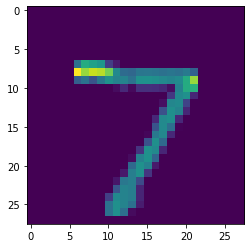

In [22]:
plt.imshow(X_test[0])

In [23]:
print(np.argmax(prediction[178]))

1


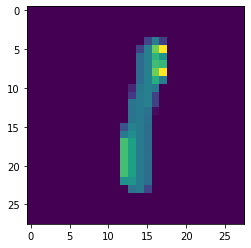

In [24]:
plt.imshow(X_test[178])

In [25]:

import cv2

In [143]:
img = cv2.imread('Digits//five_1_28.png')

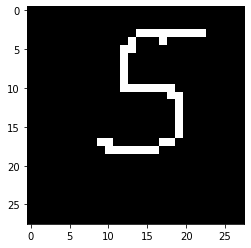

In [144]:

plt.imshow(img)

In [145]:
img.shape

(28, 28, 3)

In [146]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(28, 28)

In [147]:
resized = cv2.resize(gray, (28, 28), interpolation= cv2.INTER_AREA)
resized.shape

(28, 28)

In [148]:
newImg = tf.keras.utils.normalize(resized, axis=1)

In [149]:
newImg = np.array(newImg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
newImg.shape

(1, 28, 28, 1)

In [150]:
prediction = model.predict(newImg)
print("The predcition is ", np.argmax(prediction))

1/1 [==============================] - 0s 25ms/step
The predcition is  5
